<a href="https://colab.research.google.com/github/DDR7707/Hand-On-ML-Book-Practice/blob/main/10.1.Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
y_preds = per_clf.predict([[2 , 0.5]])
y_preds

array([0])

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
tf.__version__

'2.5.0'

In [15]:
keras.__version__

'2.5.0'

## Building an Image Classier Using the Sequential API

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [17]:
X_train_full.shape

(60000, 28, 28)

In [18]:
X_train_full.dtype

dtype('uint8')

In [19]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [20]:
class_names[y_train[0]]

'Coat'

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


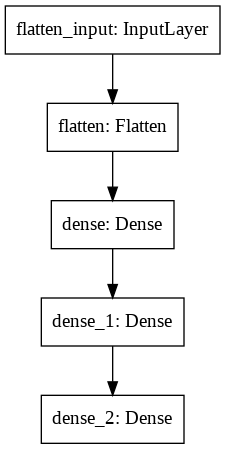

In [23]:
tf.keras.utils.plot_model(model)

In [24]:
model.layers

In [25]:
model.layers[1].name

'dense'

In [26]:
model.get_layer('dense').name

'dense'

In [27]:
weights = model.layers[1].get_weights()[0]
weights

array([[-0.04769269, -0.0633083 , -0.02368325, ..., -0.04667392,
         0.03540333, -0.04124276],
       [ 0.05781297,  0.03364114, -0.03858175, ...,  0.0317345 ,
        -0.03060204,  0.01964295],
       [-0.04421776, -0.00604939, -0.04294005, ...,  0.03493921,
        -0.07265826, -0.03688613],
       ...,
       [-0.00826229, -0.04742423, -0.05567095, ...,  0.06816202,
         0.00666654, -0.05701569],
       [ 0.06996746, -0.05675248, -0.0075421 , ..., -0.06011916,
        -0.04674466,  0.02283454],
       [-0.03898555, -0.02599032,  0.05149755, ..., -0.03089306,
         0.02696386,  0.06589356]], dtype=float32)

In [28]:
biases = model.layers[1].get_weights()[1]
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
weights.shape

(784, 300)

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [32]:
%%time
history = model.fit(X_train, y_train, epochs=30,validation_data = (X_valid , y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 2ms/step - loss: 0.7232 - accuracy: 0.7602 - val_loss: 0.5256 - val_accuracy: 0.8202
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4916 - accuracy: 0.8300 - val_loss: 0.4910 - val_accuracy: 0.8234
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4444 - accuracy: 0.8436 - val_loss: 0.4108 - val_accuracy: 0.8594
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4180 - accuracy: 0.8535 - val_loss: 0.3992 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3977 - accuracy: 0.8608 - val_loss: 0.4163 - val_accuracy: 0.8588
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8662 - val_loss: 0.3696 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3671 - accuracy: 0.8699 - val_loss: 0.3586 - val_accuracy:

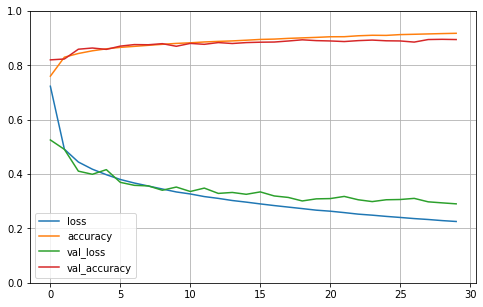

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [34]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.1578 - accuracy: 0.8420


[66.1578369140625, 0.8420000076293945]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_preds = model.predict_classes(X_new)
y_preds

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [37]:
np.array(class_names)[y_preds]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
 housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
 X_train_full, y_train_full)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20,
 validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2

## Building Complex Models Using the Functional API

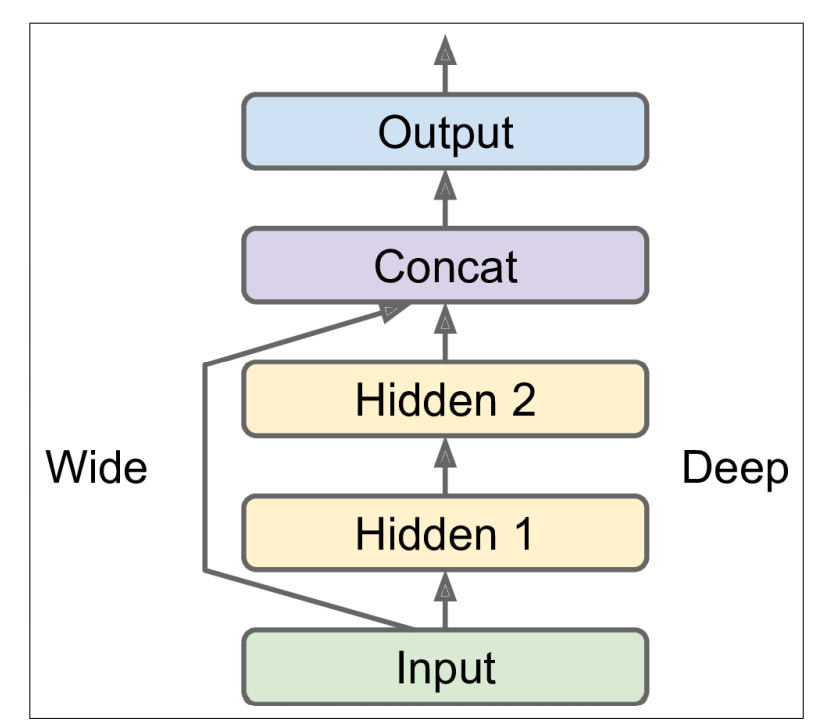

In [41]:
# California housing problem

input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [42]:
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [43]:
model.compile(loss="mse", optimizer="sgd")
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]


history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_valid_A, X_valid_B), y_valid))


mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2

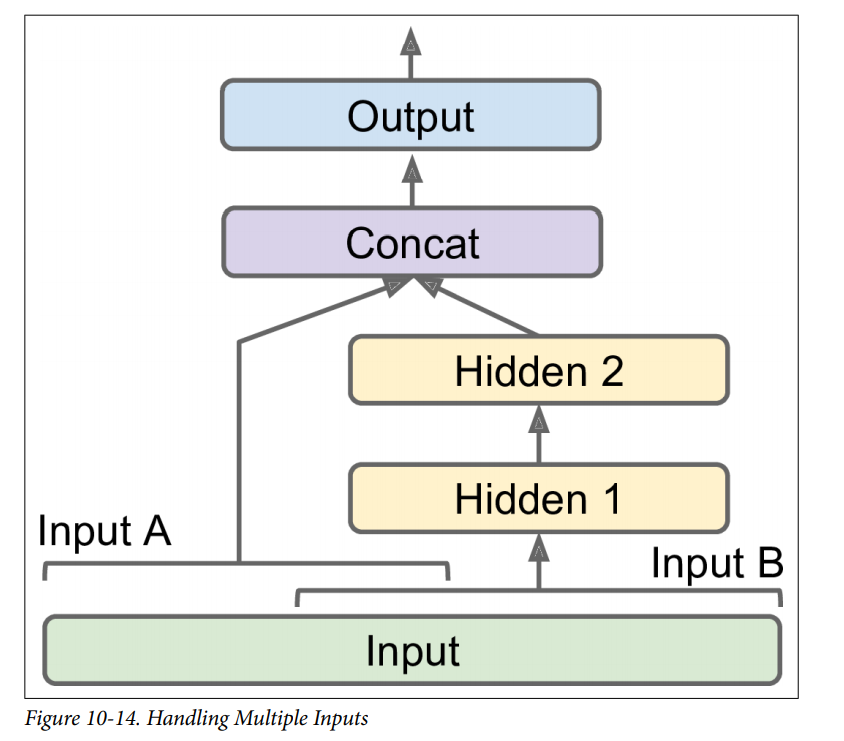

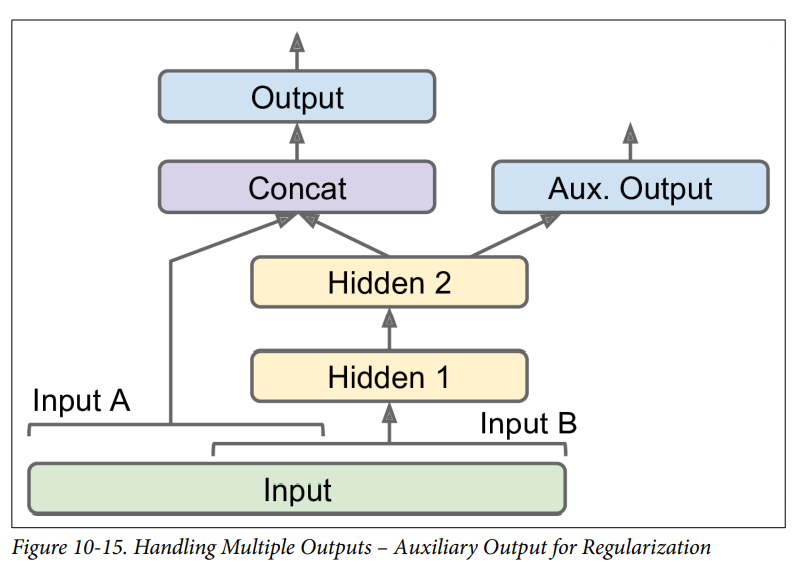

In [44]:
[...] # Same as above, up to the main output layer
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
 outputs=[output, aux_output])

In [45]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [46]:
history = model.fit(
 [X_train_A, X_train_B], [y_train, y_train], epochs=20,
 validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: nan - dense_11_loss: nan - dense_12_loss: nan - val_loss: nan - val_dense_11_loss: nan - val_dense_12_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: nan - dense_11_loss: nan - dense_12_loss: nan - val_loss: nan - val_dense_11_loss: nan - val_dense_12_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: nan - dense_11_loss: nan - dense_12_loss: nan - val_loss: nan - val_dense_11_loss: nan - val_dense_12_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: nan - dense_11_loss: nan - dense_12_loss: nan - val_loss: nan - val_dense_11_loss: nan - val_dense_12_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: nan - dense_11_loss: nan - dense_12_loss: nan - val_loss: nan - val_dense_11_loss: nan - val_dense_12_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - lo

In [47]:
total_loss, main_loss, aux_loss = model.evaluate(
 [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: nan - dense_11_loss: nan - dense_12_loss: nan


In [48]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Building Dynamic Models Using the Subclassing API

In [49]:
class WideAndDeepModel(keras.models.Model):
 def __init__(self, units=30, activation="relu", **kwargs):
     super().__init__(**kwargs) # handles standard args (e.g., name)
     self.hidden1 = keras.layers.Dense(units, activation=activation)
     self.hidden2 = keras.layers.Dense(units, activation=activation)
     self.main_output = keras.layers.Dense(1)
     self.aux_output = keras.layers.Dense(1)


 def call(self, inputs):
     input_A, input_B = inputs
     hidden1 = self.hidden1(input_B)
     hidden2 = self.hidden2(hidden1)
     concat = keras.layers.concatenate([input_A, hidden2])
     main_output = self.main_output(concat)
     aux_output = self.aux_output(hidden2)
     return main_output, aux_output

model_dynamic = WideAndDeepModel()

## Saving and Restoring a Mode

In [50]:
model.save("my_keras_model.h5")

In [51]:
model = keras.models.load_model("my_keras_model.h5")

## Using Callbacks

In [52]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target , test_size = 0.2 , random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(30 , activation = "relu"),
 keras.layers.Dense(20 , activation = "relu"),
 keras.layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_18 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_19 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 21        
Total params: 1,841
Trainable params: 1,841
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss = keras.losses.mean_squared_error , optimizer = "sgd" , metrics = ["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath = "Best_weights.h5" , moniotor = "val_accuracy" , save_weights_only = True , mode = "max" , save_best_only = True)
history = model.fit(X_train , y_train , epochs=20 , validation_split = 0.1 , callbacks = [checkpoint_cb])

Epoch 1/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0

In [70]:
model_weights = model.load_weights("Best_weights.h5")

In [73]:
model.compile(loss = keras.losses.mean_squared_error , optimizer = "sgd" , metrics = ["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath = "Best_model" , moniotor = "val_accuracy" , save_best_only = True , mode = "max")
history = model.fit(X_train , y_train , epochs=20 , validation_split = 0.1 , callbacks = [checkpoint_cb])

Epoch 1/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
465/465 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0

In [74]:
model_best = model.save("Best_model")

INFO:tensorflow:Assets written to: Best_model/assets


### EarlyStopping

In [75]:
# After compiling the model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10 , restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accura

### Custom Callbacks

In [76]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs):
     print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

## TensorBoard

In [88]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
   import time
   run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
   return os.path.join(root_logdir, run_id)

In [89]:
run_logdir = get_run_logdir() # e.g., ./my_logs/run_2021_06_18-17_25_24

In [90]:
run_logdir

'./my_logs/run_2021_06_18-17_25_24'

In [91]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
516/516 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/30
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/30
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/30
516/516 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/30
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/30
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/30
516/516 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0

In [93]:
! tensorboard --logdir=./my_logs --port=6006

2021-06-18 17:27:37.195561: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.5.0 at http://localhost:6006/ (Press CTRL+C to quit)
CRTL+C

Exception ignored in: <module 'threading' from '/usr/lib/python3.7/threading.py'>
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 1294, in _shutdown
    _main_thread._stop()
  File "/usr/lib/python3.7/threading.py", line 1000, in _stop
    with _shutdown_locks_lock:
KeyboardInterrupt: 


## Fine-Tuning Neural Network Hyperparameters

In [79]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
     model = keras.models.Sequential()
     options = {"input_shape": input_shape}
     for layer in range(n_hidden):
          model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
          options = {}
     model.add(keras.layers.Dense(1, **options))
     optimizer = keras.optimizers.SGD(learning_rate)
     model.compile(loss="mse", optimizer=optimizer)
     return model

In [80]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [82]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target , test_size = 0.2 , random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
keras_reg.fit(X_train, y_train, epochs=100,
 validation_data=(X_valid, y_valid),
 callbacks=[keras.callbacks.EarlyStopping(patience=10)])


mse_test = keras_reg.score(X_test, y_test)

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: inf - val_loss: inf              
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: inf - val_loss: inf
Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: inf - val_loss: inf
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: inf - val_loss: 7049929255475821060269586304204800.0000
Epoch 5/100
516/516 [==============================] - 1s 1ms/step - loss: 1139686208421096293869457177051136.0000 - val_loss: 14155788738640621170529449017344.0000
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 2288415125153396492078145339392.0000 - val_loss: 28423744410466045494718103552.0000
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 4594964118711546490298302464.0000 - val_loss: 57072948727030248313454592.0000
Epoch 8/100
516/516 [==============================] - 1s 1ms/step - loss: 922637712675653355

In [84]:
mse_test

-1.3109666109085083

In [85]:
# from scipy.stats import reciprocal
# from sklearn.model_selection import RandomizedSearchCV

# param_distribs = {
#  "n_hidden": [0, 1, 2, 3],
#  "n_neurons": np.arange(1, 100),
#  "learning_rate": reciprocal(3e-4, 3e-2),
# }
# rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
# rnd_search_cv.fit(X_train, y_train, epochs=100 , validation_data=(X_valid, y_valid) , callbacks=[keras.callbacks.EarlyStopping(patience=10)])


In [86]:
# rnd_search_cv.best_params_
# rnd_search_cv.best_score_

# model = rnd_search_cv.best_estimator_.model